In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [3]:
data = pd.read_csv(r"C:\Users\Mega Computer\Desktop\Data Science Internship\NLP\Play Store Review Analysis\reviews.csv")

In [4]:
data.head(500)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo
...,...,...,...,...,...,...,...,...,...,...,...,...
495,gp:AOqpTOEZzxVTSgnSmc8J1jOT0JjiZ9IMHG2XHKc8nj8...,Melody Mountain,https://play-lh.googleusercontent.com/-V3RFN-T...,I really like this apps cos it allows me to pl...,3,0,NaN,2020-06-09 20:55:35,How do you think we can make this a 5 stars re...,2020-06-10 12:18:01,newest,com.anydo
496,gp:AOqpTOHFTuTQVzJdXosXoj53_RjTJrxzEereztcI554...,Hayati Assyikin,https://play-lh.googleusercontent.com/a-/AOh14...,This is a simple free app. With an easy to use...,3,1,NaN,2020-06-05 12:27:33,"90% of the app is completely free, including a...",2020-06-08 12:13:54,newest,com.anydo
497,gp:AOqpTOF4nr2SJePYPSl2C8x72o0Ke17r7B8o6osI_Ve...,ZAH ZAH,https://play-lh.googleusercontent.com/a-/AOh14...,Missing an important feature!!! They need to a...,3,6,5.1.1.13,2020-06-05 11:16:33,Thank you for your feedback. We truly value ou...,2020-06-08 12:12:20,newest,com.anydo
498,gp:AOqpTOGR9MgyuCijTDPkCCr71gUg-AKmMnV4LxqcjCr...,Harsh soni,https://play-lh.googleusercontent.com/a-/AOh14...,"Bug is there in recent version, whenever i try...",3,1,NaN,2020-06-04 20:28:26,Sorry about that. We are unaware of any issues...,2020-06-07 12:26:51,newest,com.anydo


In [5]:
data.shape

(12495, 12)

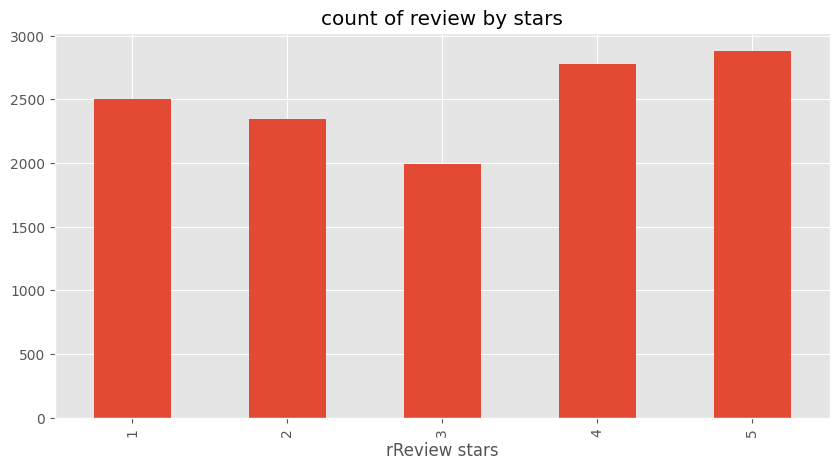

In [6]:
ax =data['score'].value_counts().sort_index().plot(kind = 'bar',title = 'count of review by stars', figsize =(10,5))
ax.set_xlabel('rReview stars')
plt.show()

In [7]:
example = data['content'][500]
print(example)

It is not working


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['It', 'is', 'not', 'working']

NLTK

In [9]:
#import nltk
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('vader_lexicon')

In [10]:
tagged =nltk.pos_tag(tokens)
tagged[:10]

[('It', 'PRP'), ('is', 'VBZ'), ('not', 'RB'), ('working', 'VBG')]

In [11]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S It/PRP is/VBZ not/RB working/VBG)


Apply VADER Seniment Scoring

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia =SentimentIntensityAnalyzer()

let's run some test

In [13]:
sia.polarity_scores('I am happy')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [14]:
sia.polarity_scores('the app does not working')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [15]:
print(example)
sia.polarity_scores(example)

It is not working


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
data['nopunc'] = data['content'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [18]:
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId,nopunc
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo,"[I, , c, a, n, n, o, t, , o, p, e, n, , t, ..."
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo,"[I, , h, a, v, e, , b, e, e, n, , b, e, g, ..."
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo,"[V, e, r, y, , c, o, s, t, l, y, , f, o, r, ..."
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo,"[U, s, e, d, , t, o, , k, e, e, p, , m, e, ..."
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo,"[D, a, n, , B, i, r, t, h, d, a, y, , O, c, ..."


In [19]:
data.dtypes
data['nopunc'] = data['nopunc'].apply(''.join)

In [20]:
res={}
for index, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['content']
        myid = row['reviewId']
        res[myid] = sia.polarity_scores(text)
    except Exception as e:
        print(f"Error processing row {index}: {e}")

  0%|          | 0/12495 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'reviewId'})

In [22]:
vaders.columns

Index(['reviewId', 'neg', 'neu', 'pos', 'compound'], dtype='object')

In [23]:
data.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'sortOrder', 'appId', 'nopunc'],
      dtype='object')

In [24]:
vaders = vaders.merge(data, how='left')

In [25]:
vaders.columns

Index(['reviewId', 'neg', 'neu', 'pos', 'compound', 'userName', 'userImage',
       'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'sortOrder', 'appId', 'nopunc'],
      dtype='object')

In [26]:
#meta data with sentiment score
vaders = vaders.drop(['userName', 'userImage','thumbsUpCount', 'reviewCreatedVersion', 'at',
       'replyContent', 'repliedAt', 'sortOrder'],axis = 1)
vaders.head()

,reviewId,neg,neu,pos,compound,content,score,appId,nopunc
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,0.000,1.000,0.000,0.0000,I cannot open the app anymore,1,com.anydo,I cannot open the app anymore
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,0.000,1.000,0.000,0.0000,I have been begging for a refund from this app...,1,com.anydo,I have been begging for a refund from this app...
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,0.042,0.809,0.149,0.6597,Very costly for the premium version (approx In...,1,com.anydo,Very costly for the premium version approx Ind...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,0.202,0.772,0.026,-0.8576,"Used to keep me organized, but all the 2020 UP...",1,com.anydo,Used to keep me organized but all the 2020 UPD...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,0.000,1.000,0.000,0.0000,Dan Birthday Oct 28,1,com.anydo,Dan Birthday Oct 28


Plot Vader Results

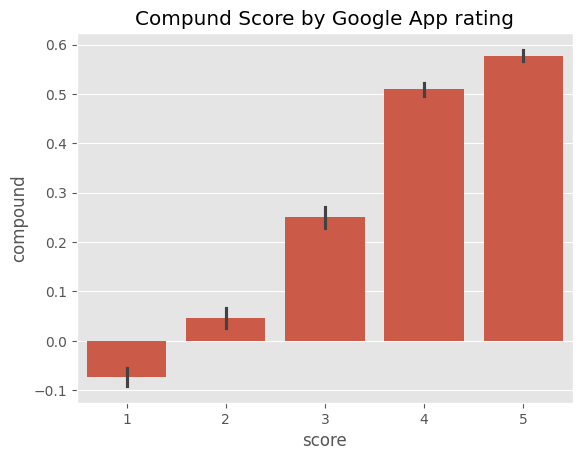

In [27]:
ax = sns.barplot(data=vaders, x='score', y='compound')
ax.set_title('Compund Score by Google App rating')
plt.show()

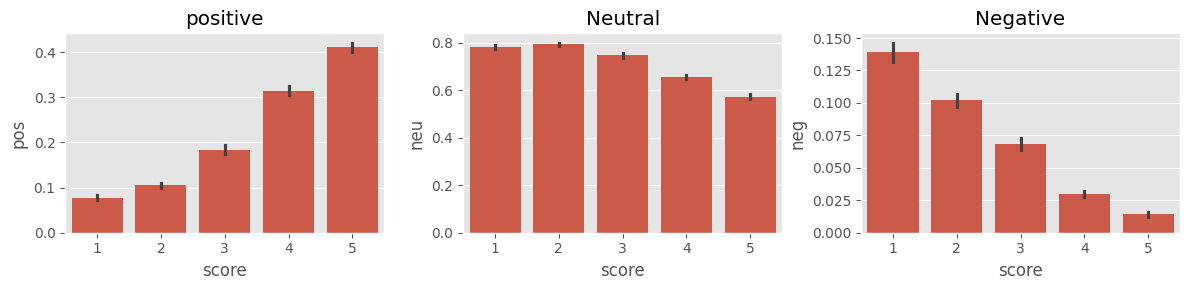

In [28]:
# ax =sns.barplot(data = new_df, x ='score',y ='compound')
# ax.set_title('compound score by star review')

fig,axs = plt.subplots(1,3, figsize =(12,3))
sns.barplot(data = vaders, x ='score',y ='pos', ax= axs[0])
sns.barplot(data = vaders, x ='score',y ='neu', ax= axs[1])
sns.barplot(data = vaders, x ='score',y ='neg', ax= axs[2])

axs[0].set_title('positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

Roberta Pretrained Model

In [29]:
import torch

In [30]:
# from transformers import AutoTokenizer
#from transformers import AutoModelForSequenceClassification
#from scipy.special import softmax

from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer, AutoConfig
import numpy as np
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of

In [32]:
# Vader results on example
print(example)
sia.polarity_scores(example)

It is not working


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [33]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.4748591, 'roberta_neu': 0.4727299, 'roberta_pos': 0.05241098}


In [34]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [35]:
res={}
for index, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['content']
        myid = row['reviewId']
        vader_result = sia.polarity_scores(text)
        roberta_result = polarity_scores_roberta(text)
        vader_result_rename ={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/12495 [00:00<?, ?it/s]

Broke for id gp:AOqpTOG-yLPXe4GxbSsDa2aUT2vBKCQYLGM-bSAfJDOepGOYjYURfPekdhXKentQfnzyo2PwtTOPVFZ3WtlrHa0
Broke for id gp:AOqpTOEsSp_4QOhxbTIu3fEpWxiOIYFE3t4XmkTqmRZMGHGQ1uV427CsmyH4Vy6vzu7cWARTkkdUooe1hZgTxg
Broke for id gp:AOqpTOEKDIPD9FWPqz5HvglBU1f1h82MiHfkPjkcQjdP0b7phBynBAU0BaYhP79cR_VcajqcDXkdob07WolVWQ
Broke for id gp:AOqpTOFW67J6jJDlFWahpUDDExopgYL5PTYfvCvqbit0wUIW-kmw_zm_-ILPPcBxupNc2o6KNzm0tDARANkl
Broke for id gp:AOqpTOH6_huL2kpzlzPl3DelNWIhiy3DAB8KYFgplZ9v0O5I6H7lrLHYWFxJDKiQ6oxxxLlTV7SFkXKLot53
Broke for id gp:AOqpTOE9t1H9W90Kzu-jCJ17yOCr6B_fzqQ7sbcSfTX2SS3E8UInHHc1PUdY1CJdCAC0Kujnts3vL7aP9WF1HXQ


In [36]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'reviewId'})
results_df.head()

,reviewId,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,0.000,1.000,0.000,0.0000,0.737974,0.240282,0.021744
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,0.000,1.000,0.000,0.0000,0.904107,0.084490,0.011403
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,0.042,0.809,0.149,0.6597,0.303060,0.498499,0.198441
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,0.202,0.772,0.026,-0.8576,0.799822,0.177651,0.022527
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,0.000,1.000,0.000,0.0000,0.010567,0.711726,0.277707


In [37]:
#merge the table
results_df = results_df.merge(vaders, how='left')

Combine and Compare

In [38]:
results_df.columns

Index(['reviewId', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'neg', 'neu', 'pos',
       'compound', 'content', 'score', 'appId', 'nopunc'],
      dtype='object')

In [39]:
vaders = vaders.drop(['content'],axis = 1)
vaders.head()

,reviewId,neg,neu,pos,compound,score,appId,nopunc
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,0.000,1.000,0.000,0.0000,1,com.anydo,I cannot open the app anymore
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,0.000,1.000,0.000,0.0000,1,com.anydo,I have been begging for a refund from this app...
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,0.042,0.809,0.149,0.6597,1,com.anydo,Very costly for the premium version approx Ind...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,0.202,0.772,0.026,-0.8576,1,com.anydo,Used to keep me organized but all the 2020 UPD...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,0.000,1.000,0.000,0.0000,1,com.anydo,Dan Birthday Oct 28


In [40]:
results_df.head()

,reviewId,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,neg,neu,pos,compound,content,score,appId,nopunc
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,0.000,1.000,0.000,0.0000,0.737974,0.240282,0.021744,0.000,1.000,0.000,0.0000,I cannot open the app anymore,1,com.anydo,I cannot open the app anymore
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,0.000,1.000,0.000,0.0000,0.904107,0.084490,0.011403,0.000,1.000,0.000,0.0000,I have been begging for a refund from this app...,1,com.anydo,I have been begging for a refund from this app...
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,0.042,0.809,0.149,0.6597,0.303060,0.498499,0.198441,0.042,0.809,0.149,0.6597,Very costly for the premium version (approx In...,1,com.anydo,Very costly for the premium version approx Ind...
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,0.202,0.772,0.026,-0.8576,0.799822,0.177651,0.022527,0.202,0.772,0.026,-0.8576,"Used to keep me organized, but all the 2020 UP...",1,com.anydo,Used to keep me organized but all the 2020 UPD...
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,0.000,1.000,0.000,0.0000,0.010567,0.711726,0.277707,0.000,1.000,0.000,0.0000,Dan Birthday Oct 28,1,com.anydo,Dan Birthday Oct 28


In [41]:
results_df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

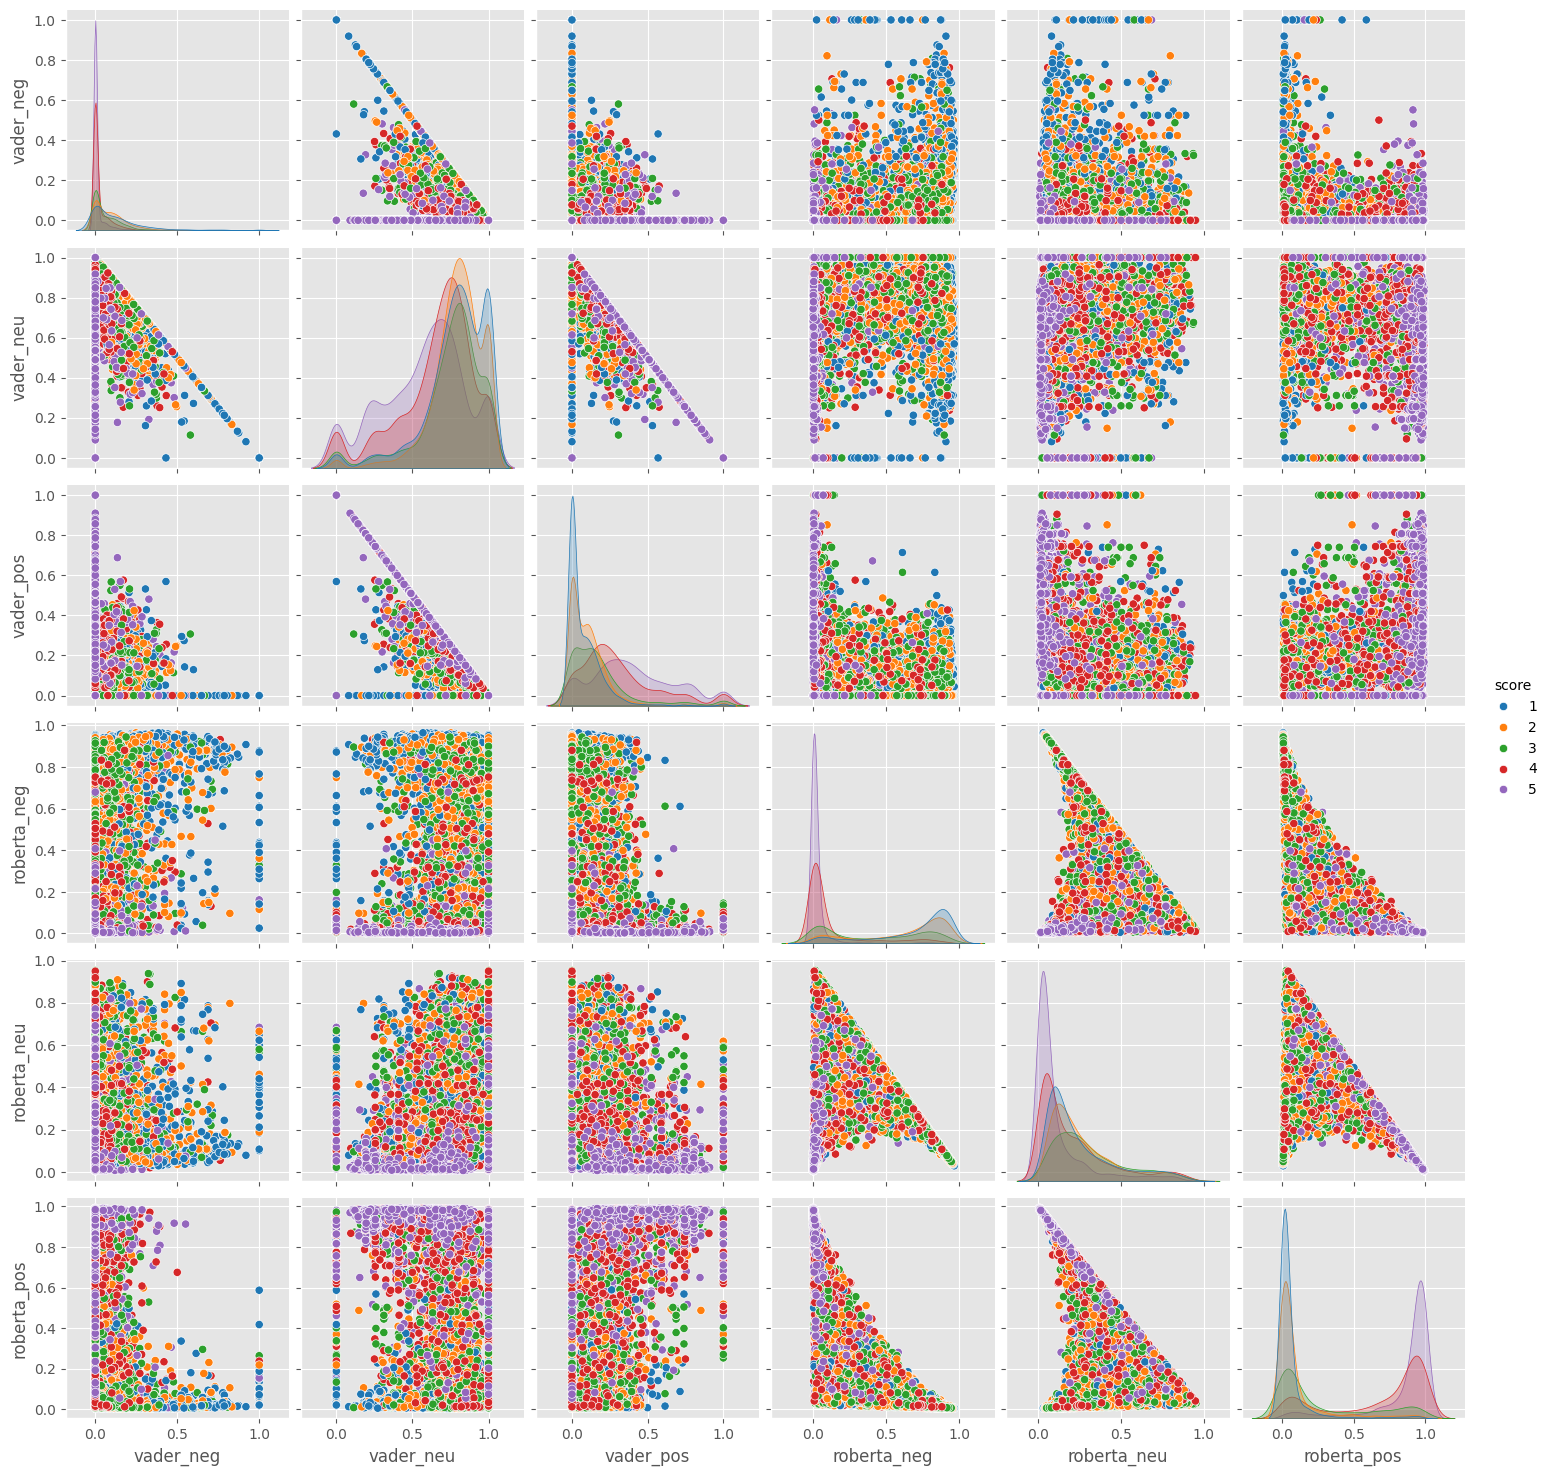

In [42]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos',],
            hue='score',
            palette='tab10')
plt.show()

In [43]:
results_df.query('score == 1') \
    .sort_values('roberta_pos', ascending=False)['nopunc'].values[2]

'🔥 UPDATE Only manual sync works Down to 1 🌟 until you fix this Best calendar out there Love it It looks great works flawlesly erganomics  ease of use is absolutely outstanding and Im sure it tastes good as well if you could eat it'

In [44]:
results_df.query('score == 1') \
    .sort_values('vader_neg', ascending=False)['nopunc'].values[5]

'Worst'

In [45]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

c:\Users\Mega Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [46]:
sent_pipeline("Very costly for the premium version approx Ind")

[{'label': 'NEGATIVE', 'score': 0.9995569586753845}]